In [82]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

In [83]:
# Correctly define your bucket name and object key
bucket_name = 'flumedata-cloudcomputing'  # Just the bucket name
object_key = 'Demo_Data/hour_by_hour_combined/combined_csv.csv'  # Path to the file within the bucket

# Get the SageMaker execution role and create an S3 client
role = get_execution_role()
s3_client = boto3.client('s3')

# Generate a presigned URL for the S3 object
url = s3_client.generate_presigned_url('get_object',
                                       Params={'Bucket': bucket_name, 'Key': object_key},
                                       ExpiresIn=3600)

# Load the CSV data into a pandas DataFrame
combined_df = pd.read_csv(url)

In [84]:
combined_df.head()

,DATE,TOTAL
0,1/21/2024 0:00,0.0
1,1/21/2024 1:00,0.0
2,1/21/2024 2:00,0.0
3,1/21/2024 3:00,0.0
4,1/21/2024 4:00,0.0


In [85]:
import pandas as pd

In [87]:
combined_df['DATE'] = pd.to_datetime(combined_df['DATE'])

In [88]:
combined_df['DATE_ONLY'] = combined_df['DATE'].dt.date
combined_df['HOUR'] = combined_df['DATE'].dt.time

In [89]:
combined_df.head(30)

,DATE,TOTAL,DATE_ONLY,HOUR
0,2024-01-21 00:00:00,0.000000,2024-01-21,00:00:00
1,2024-01-21 01:00:00,0.000000,2024-01-21,01:00:00
2,2024-01-21 02:00:00,0.000000,2024-01-21,02:00:00
3,2024-01-21 03:00:00,0.000000,2024-01-21,03:00:00
4,2024-01-21 04:00:00,0.000000,2024-01-21,04:00:00
5,2024-01-21 05:00:00,0.000000,2024-01-21,05:00:00
6,2024-01-21 06:00:00,1.412139,2024-01-21,06:00:00
7,2024-01-21 07:00:00,0.000000,2024-01-21,07:00:00
8,2024-01-21 08:00:00,0.000000,2024-01-21,08:00:00
9,2024-01-21 09:00:00,2.747946,2024-01-21,09:00:00


In [90]:
combined_df.drop(columns=['DATE'], inplace=True)

In [91]:
combined_df.head(30)

,TOTAL,DATE_ONLY,HOUR
0,0.000000,2024-01-21,00:00:00
1,0.000000,2024-01-21,01:00:00
2,0.000000,2024-01-21,02:00:00
3,0.000000,2024-01-21,03:00:00
4,0.000000,2024-01-21,04:00:00
5,0.000000,2024-01-21,05:00:00
6,1.412139,2024-01-21,06:00:00
7,0.000000,2024-01-21,07:00:00
8,0.000000,2024-01-21,08:00:00
9,2.747946,2024-01-21,09:00:00


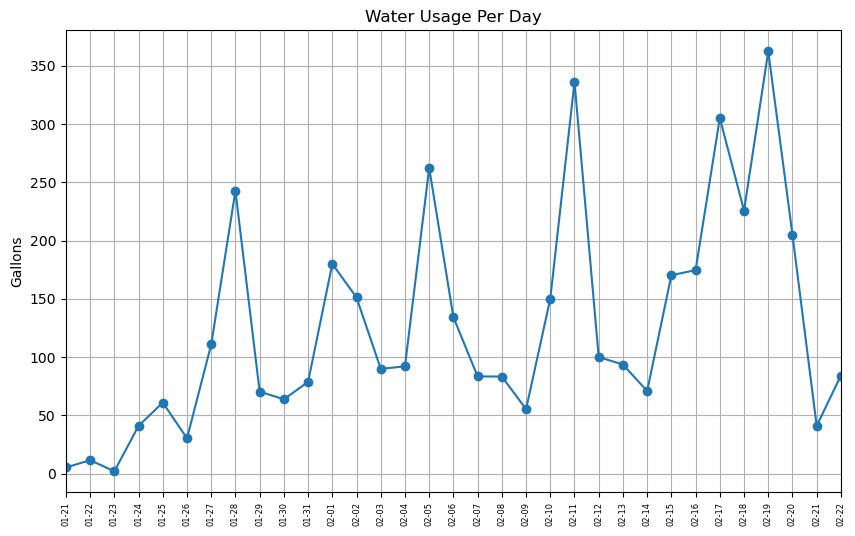

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert DATE_ONLY to datetime to ensure proper sorting
combined_df['DATE_ONLY'] = pd.to_datetime(combined_df['DATE_ONLY'])

# Filter the DataFrame to include only dates up to 2024-02-22
filtered_df = combined_df[(combined_df['DATE_ONLY'] >= '2024-01-21') & (combined_df['DATE_ONLY'] <= '2024-02-22')]

# Aggregate data by DATE_ONLY
daily_totals = filtered_df.groupby('DATE_ONLY')['TOTAL'].sum().reset_index()

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plotting
plt.plot(daily_totals['DATE_ONLY'], daily_totals['TOTAL'], marker='o', linestyle='-')

# Formatting the date on X-axis to show only month-day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Set limits for x-axis
plt.gca().set_xlim([daily_totals['DATE_ONLY'].min(), daily_totals['DATE_ONLY'].max()])

# Set the locator to show every day
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Set the font size even smaller and rotate the labels to vertical
plt.gca().tick_params(axis='x', which='major', labelsize=6, rotation=90)

plt.title('Water Usage Per Day')
plt.ylabel('Gallons')

plt.grid(True)

# Save the figure
plt.savefig('water_usage_per_day.png', dpi=300, bbox_inches='tight')

plt.show()


In [108]:
# Filter out the rows where HOUR is '00:00:00'
combined_df_filtered = combined_df[combined_df['HOUR'] != '00:00:00']

# Now you can check the first few rows to confirm the rows have been dropped
combined_df_filtered.head()

,TOTAL,DATE_ONLY,HOUR
1,0.0,2024-01-21,01:00:00
2,0.0,2024-01-21,02:00:00
3,0.0,2024-01-21,03:00:00
4,0.0,2024-01-21,04:00:00
5,0.0,2024-01-21,05:00:00


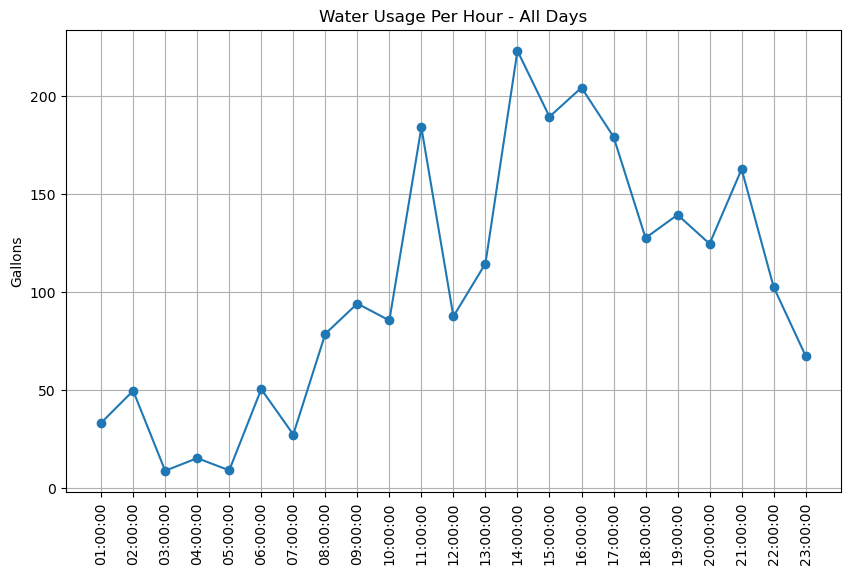

In [125]:
# Aggregate data by HOUR in the filtered DataFrame
hourly_totals_filtered = combined_df_filtered.groupby('HOUR')['TOTAL'].sum().reset_index()

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plotting
plt.plot(hourly_totals_filtered['HOUR'], hourly_totals_filtered['TOTAL'], marker='o', linestyle='-')

# Formatting the x-axis to improve readability
plt.xticks(rotation=90)

plt.title('Water Usage Per Hour - All Days')
plt.ylabel('Gallons')

plt.grid(True)

# Save the figure before showing it
plt.savefig('total_values_per_hour_excluding_midnight.png', dpi=300, bbox_inches='tight')

# Now display the figure
plt.show()

In [116]:
# Ensure DATE_ONLY is a datetime object (should already be if you've followed previous steps)
combined_df_filtered['DATE_ONLY'] = pd.to_datetime(combined_df_filtered['DATE_ONLY'])

# Create the DAY_OF_WEEK column
combined_df_filtered['DAY_OF_WEEK'] = combined_df_filtered['DATE_ONLY'].dt.day_name()

# Check the first few rows to confirm the new column
combined_df_filtered.head()


/tmp/ipykernel_4037/3633399191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_filtered['DATE_ONLY'] = pd.to_datetime(combined_df_filtered['DATE_ONLY'])
/tmp/ipykernel_4037/3633399191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_filtered['DAY_OF_WEEK'] = combined_df_filtered['DATE_ONLY'].dt.day_name()


,TOTAL,DATE_ONLY,HOUR,DAY_OF_WEEK
1,0.0,2024-01-21,01:00:00,Sunday
2,0.0,2024-01-21,02:00:00,Sunday
3,0.0,2024-01-21,03:00:00,Sunday
4,0.0,2024-01-21,04:00:00,Sunday
5,0.0,2024-01-21,05:00:00,Sunday


In [117]:
combined_df_filtered.head(30)

,TOTAL,DATE_ONLY,HOUR,DAY_OF_WEEK
1,0.000000,2024-01-21,01:00:00,Sunday
2,0.000000,2024-01-21,02:00:00,Sunday
3,0.000000,2024-01-21,03:00:00,Sunday
4,0.000000,2024-01-21,04:00:00,Sunday
5,0.000000,2024-01-21,05:00:00,Sunday
6,1.412139,2024-01-21,06:00:00,Sunday
7,0.000000,2024-01-21,07:00:00,Sunday
8,0.000000,2024-01-21,08:00:00,Sunday
9,2.747946,2024-01-21,09:00:00,Sunday
10,0.000000,2024-01-21,10:00:00,Sunday


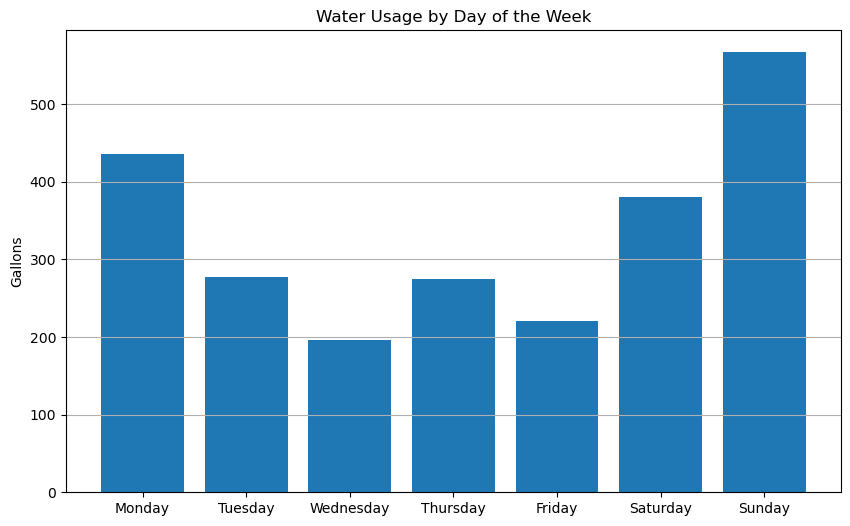

In [126]:
# Aggregate totals by DAY_OF_WEEK
weekly_totals = combined_df_filtered.groupby('DAY_OF_WEEK')['TOTAL'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Reset index to get DAY_OF_WEEK as a column
weekly_totals = weekly_totals.reset_index()

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plotting
plt.bar(weekly_totals['DAY_OF_WEEK'], weekly_totals['TOTAL'])

plt.title('Water Usage by Day of the Week')
plt.ylabel('Gallons')

plt.grid(True, axis='y')

# Save the figure before showing it
plt.savefig('total_gallons_by_day_of_week.png', dpi=300, bbox_inches='tight')

# Now display the figure
plt.show()

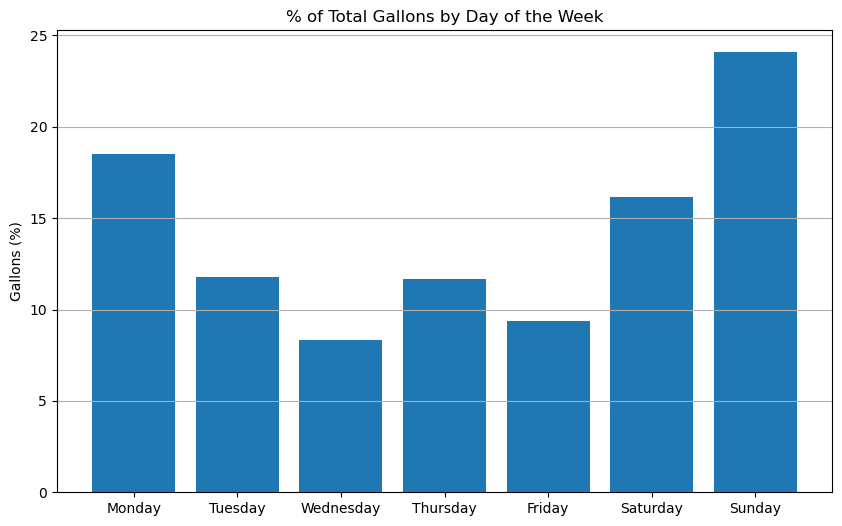

In [129]:
# Calculate the overall total
overall_total = combined_df_filtered['TOTAL'].sum()

# Aggregate totals by DAY_OF_WEEK and calculate percentages
weekly_totals_percentage = combined_df_filtered.groupby('DAY_OF_WEEK')['TOTAL'].sum() / overall_total * 100

# Reindex to ensure the days are in order
weekly_totals_percentage = weekly_totals_percentage.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plotting
plt.bar(weekly_totals_percentage['DAY_OF_WEEK'], weekly_totals_percentage['TOTAL'])

plt.title('% of Total Gallons by Day of the Week')
plt.ylabel('Gallons (%)')

plt.grid(True, axis='y')

# Save the figure before showing it
plt.savefig('percentage_total_gallons_by_day_of_week.png', dpi=300, bbox_inches='tight')

# Now display the figure
plt.show()
